In [99]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [100]:
df = pd.read_csv("Dhaka Rent.csv", sep=';')
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [101]:
#area is independent feature . x
#rent is dependent . y

x = df['area']
y = df['rent']

In [102]:
x.head()

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

In [103]:
y.head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

Least Square Method

In [104]:
mean_x = np.mean(x)
mean_y = np.mean(y)

In [105]:
mean_x

2289.0

In [106]:
mean_y

37269.166666666664

Calculate Daviasion

In [107]:
dev_x = x - mean_x
dev_y = y - mean_y

dev_x.head()

0   -289.0
1   -189.0
2    211.0
3    -39.0
4    711.0
Name: area, dtype: float64

In [108]:
dev_y.head()

0    -5769.166667
1    -2269.166667
2     3780.833333
3    -1169.166667
4    14830.833333
Name: rent, dtype: float64

Calculate Slope and intecept

In [109]:
m = np.sum(dev_x * dev_y) / np.sum(dev_x ** 2)
m

21.292661473611954

In [110]:
c = mean_y - m * mean_x
c

-11469.7354464311

In [111]:
print(f"Slope (m) = {m}")
print(f"Intercept (c) = {c}")

Slope (m) = 21.292661473611954
Intercept (c) = -11469.7354464311


In [112]:
new_x = float(input('Enter any value of area: '))
predict1 = m * new_x + c

print("predicted rent is : {rent}".format(rent = predict1))

predicted rent is : 31115.58750079281


In [113]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


SKlearn

In [114]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()


In [115]:
reg.fit(df[['area']], y)
reg.coef_

array([21.29266147])

In [116]:
reg.intercept_

-11469.735446431114

In [117]:
reg.predict([[2000]])

array([31115.58750079])

Formal Work

Text(0.5, 1.0, 'area-rent visualization')

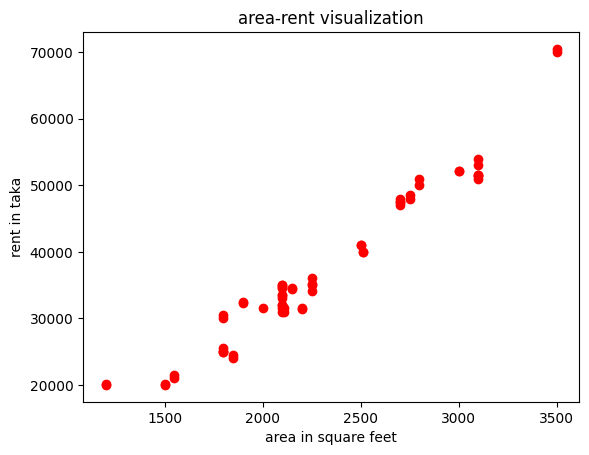

In [118]:
plt.scatter(x, y, color='red')
plt.xlabel('area in square feet')
plt.ylabel('rent in taka')
plt.title('area-rent visualization')



Data Split

In [119]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [120]:
from sklearn.model_selection import train_test_split

In [121]:
x = df.drop('rent', axis=1)
y = df[['rent']]
x.head()


,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [122]:
y.head()

,rent
0,31500
1,35000
2,41050
3,36100
4,52100


In [123]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.30)
xtrain.head()

,area
36,1500
52,3500
55,3100
4,3000
21,2100


In [124]:
ytrain.head()

,rent
36,20200
52,70500
55,54000
4,52100
21,33500


In [125]:
reg.fit(xtrain, ytrain)


LinearRegression()

In [126]:
reg.predict(xtest)

array([[55491.57003871],
       [55491.57003871],
       [48880.35464065],
       [42489.51308919],
       [53287.83157269],
       [36759.79307753],
       [46676.61617462],
       [26842.96998044],
       [26842.96998044],
       [20231.75458238],
       [33454.1853785 ],
       [33454.1853785 ],
       [55491.57003871],
       [42269.13924258],
       [26842.96998044],
       [31250.44691248],
       [34556.05461151],
       [55491.57003871]])

In [127]:
ytest.head()

,rent
29,51400
45,51000
24,50000
13,40050
34,52200


In [128]:
ytest['predicted_y'] = reg.predict(xtest)
ytest.head()

,rent,predicted_y
29,51400,55491.570039
45,51000,55491.570039
24,50000,48880.354641
13,40050,42489.513089
34,52200,53287.831573


In [129]:
ytest.drop('predicted_y', axis=1, inplace=True)
ytest.head()

,rent
29,51400
45,51000
24,50000
13,40050
34,52200


In [133]:
reg.score(xtrain, ytrain)

0.9460313937379726

In [132]:
reg.score(xtest, ytest)

0.952361317131309

MSE & MAE

In [135]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(ytest, reg.predict(xtest))

mse

5303983.616530624

In [136]:
mae = mean_absolute_error(ytest, reg.predict(xtest))

mae

1877.5510324106524

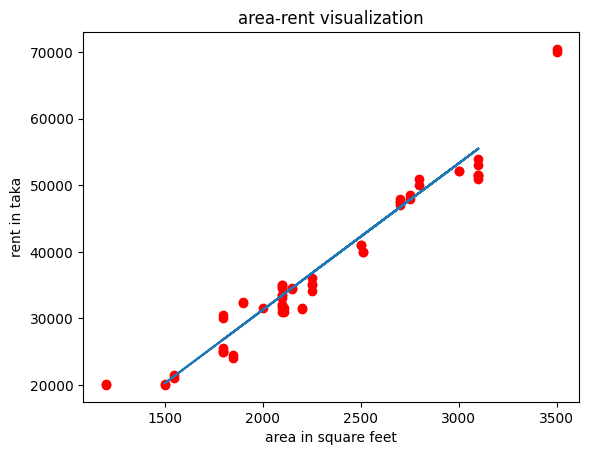

In [139]:
# plt.scatter(xtest, reg.predict(xtest))
plt.scatter(x, y, color='red')
plt.xlabel('area in square feet')
plt.ylabel('rent in taka')
plt.title('area-rent visualization')
plt.plot(xtest, reg.predict(xtest))